<a href="https://colab.research.google.com/github/salaarmir/arcticice/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from math import sqrt

In [ ]:
data = pd.read_csv('/content/N_05_extent_v3.0.csv')
data.head(10)

,year,mo,data-type,region,extent,area
0,1979,5,Goddard,N,13.86,11.11
1,1980,5,Goddard,N,13.79,10.96
2,1981,5,Goddard,N,13.80,10.99
3,1982,5,Goddard,N,13.97,11.17
4,1983,5,Goddard,N,13.49,10.87
5,1984,5,Goddard,N,13.58,10.88
6,1985,5,Goddard,N,14.07,11.25
7,1986,5,Goddard,N,13.38,10.70
8,1987,5,Goddard,N,13.74,10.97
9,1988,5,Goddard,N,13.56,11.41


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           45 non-null     int64  
 1    mo            45 non-null     int64  
 2       data-type  45 non-null     object 
 3    region        45 non-null     object 
 4    extent        45 non-null     float64
 5      area        45 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.2+ KB


In [ ]:
#df.drop(1988,axis=0,inplace=True)
data.rename({' mo':'mo' , '    data-type':'datatype' , ' region':'region' , ' extent':'extent' , '   area':'area'}, axis=1, inplace=True)
data.head()

,year,mo,datatype,region,extent,area
0,1979,5,Goddard,N,13.86,11.11
1,1980,5,Goddard,N,13.79,10.96
2,1981,5,Goddard,N,13.80,10.99
3,1982,5,Goddard,N,13.97,11.17
4,1983,5,Goddard,N,13.49,10.87


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      45 non-null     int64  
 1   mo        45 non-null     int64  
 2   datatype  45 non-null     object 
 3   region    45 non-null     object 
 4   extent    45 non-null     float64
 5   area      45 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.2+ KB


In [ ]:
df = pd.DataFrame(data)
selected_columns = ['year', 'area', 'extent']
print(df[selected_columns])

    year   area  extent
0   1979  11.11   13.86
1   1980  10.96   13.79
2   1981  10.99   13.80
3   1982  11.17   13.97
4   1983  10.87   13.49
5   1984  10.88   13.58
6   1985  11.25   14.07
7   1986  10.70   13.38
8   1987  10.97   13.74
9   1988  11.41   13.56
10  1989  11.35   13.04
11  1990  10.90   13.23
12  1991  11.50   13.47
13  1992  11.43   13.22
14  1993  11.42   13.37
15  1994  11.66   13.62
16  1995  10.90   12.97
17  1996  11.28   13.09
18  1997  11.24   13.18
19  1998  11.40   13.59
20  1999  11.66   13.75
21  2000  11.24   13.15
22  2001  11.38   13.51
23  2002  11.16   12.97
24  2003  10.89   13.02
25  2004  10.92   12.56
26  2005  10.88   12.91
27  2006  10.45   12.52
28  2007  10.77   12.78
29  2008  11.25   12.97
30  2009  11.48   13.19
31  2010  10.88   12.87
32  2011  10.74   12.68
33  2012  11.05   13.01
34  2013  11.25   13.00
35  2014  11.05   12.70
36  2015  10.90   12.47
37  2016  10.25   11.92
38  2017  11.01   12.63
39  2018  10.81   12.23
40  2019  10.50 

In [ ]:
df.describe()

,year,mo,extent,area
count,45.000000,45.0,45.000000,45.000000
mean,2001.000000,5.0,13.106222,11.053333
std,13.133926,0.0,0.508703,0.315350
min,1979.000000,5.0,11.920000,10.250000
25%,1990.000000,5.0,12.780000,10.880000
50%,2001.000000,5.0,13.040000,11.020000
75%,2012.000000,5.0,13.510000,11.250000
max,2023.000000,5.0,14.070000,11.660000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      45 non-null     int64  
 1   mo        45 non-null     int64  
 2   datatype  45 non-null     object 
 3   region    45 non-null     object 
 4   extent    45 non-null     float64
 5   area      45 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.2+ KB


In [ ]:
df.isnull().sum()

year        0
mo          0
datatype    0
region      0
extent      0
area        0
dtype: int64

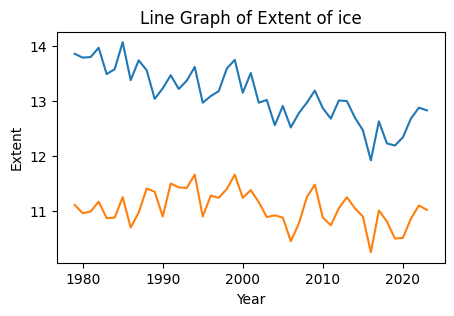

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(df['year'], df['extent'])
plt.plot(df['year'], df['area'])
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Line Graph of Extent of ice')
plt.show()

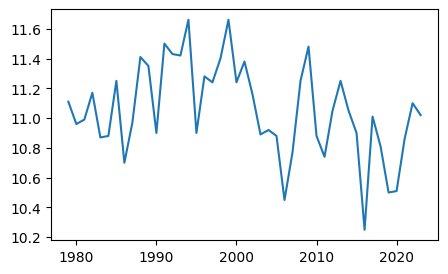

In [ ]:
plt.figure(figsize=(5,3))
four_months_moving_average = df['area'].rolling(window=45).mean()
plt.plot(df['year'], df['area'])
plt.plot(four_months_moving_average,color='red')
plt.show()

<Axes: xlabel='area', ylabel='Density'>

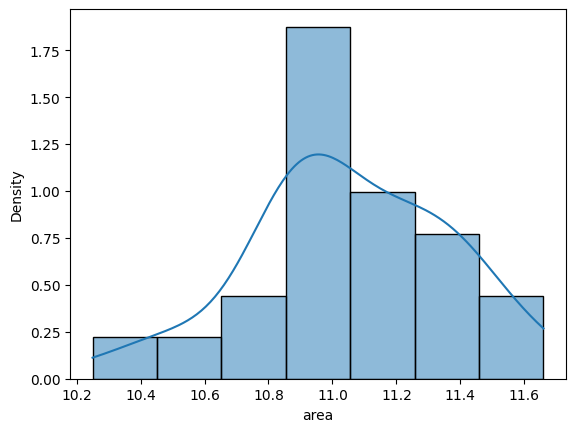

In [ ]:
sns.histplot(df['area'],kde=True,stat='density')

<Figure size 640x480 with 0 Axes>

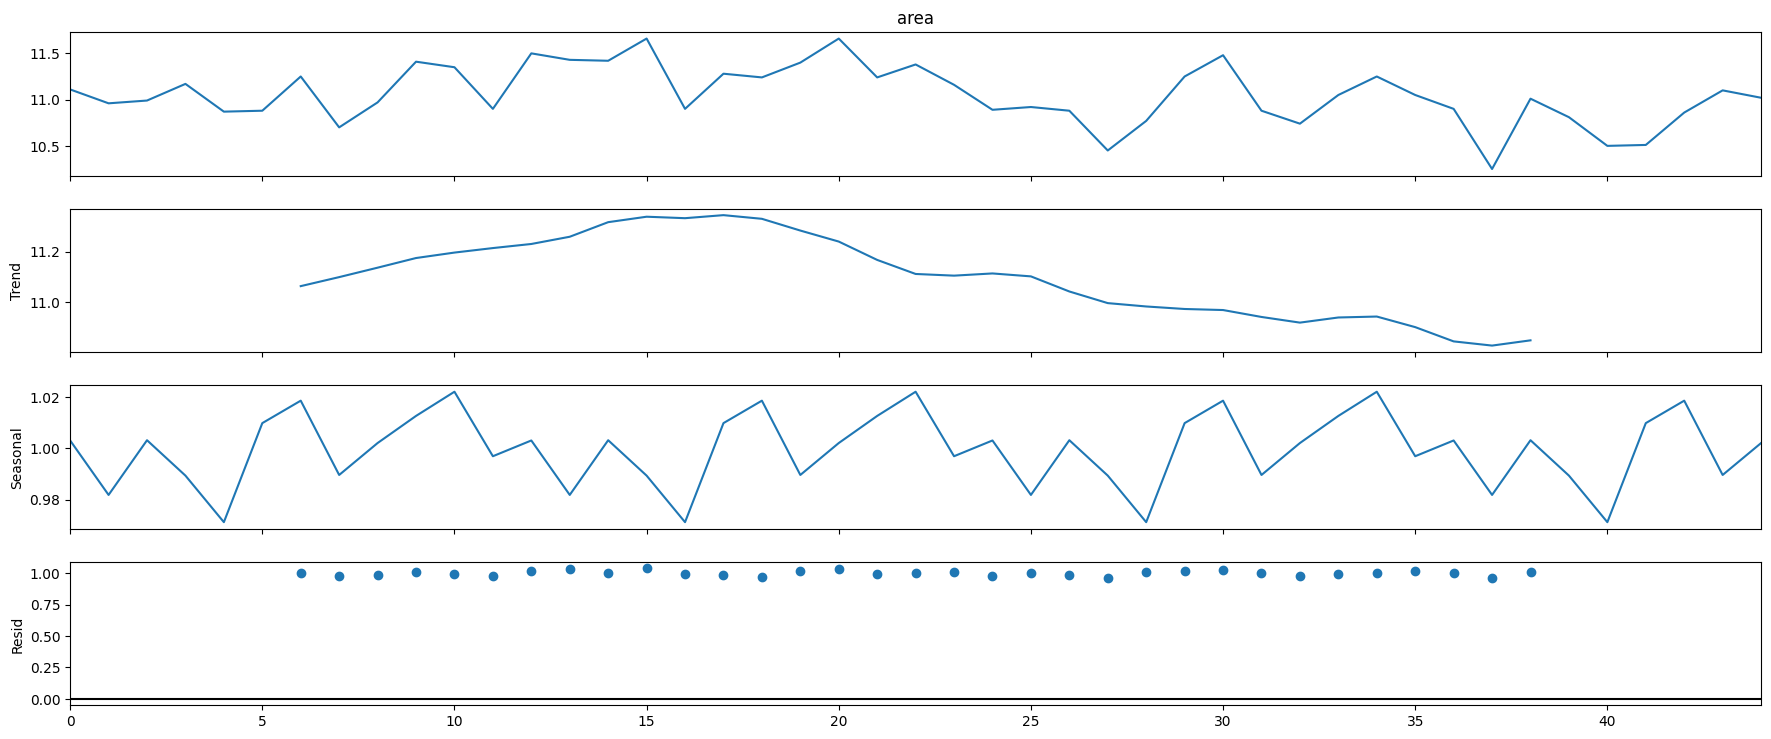

In [ ]:
seasonal=seasonal_decompose(df['area'],model='multiplicative',period=12)
fig=plt.figure()
fig=seasonal.plot()
fig.set_size_inches(20,8)

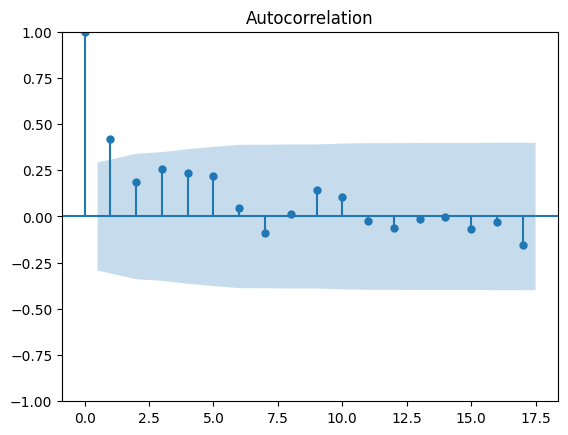

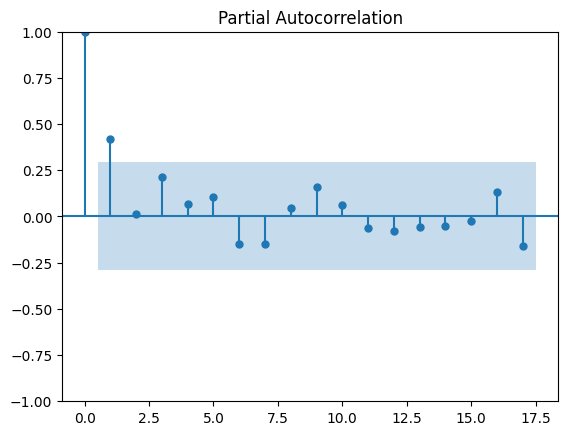

In [ ]:
acf=plot_acf(df['area'])
pacf=plot_pacf(df['area'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):

    #Pass in a time series, returns ADF report

    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

In [ ]:
adf_check(df['area'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.152449454130029
p-value : 0.0007922529195260911
Number of Lags Used : 0
Number of Observations Used : 44
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df1= pd.DataFrame(np.log(df.area).diff().diff(1))
adf_check(df1.area.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.124408611726544
p-value : 8.698843625263806e-08
Number of Lags Used : 4
Number of Observations Used : 38
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


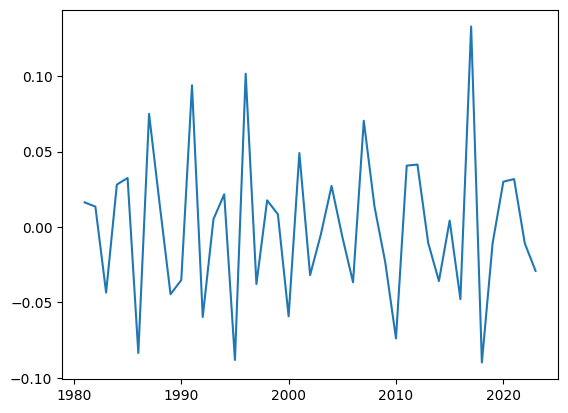

In [ ]:
plt.plot(df['year'], df1['area'])

In [ ]:
def AR(p,df):
  df_temp = df

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['area'].shift(i)

  train_size = (int)(0.8 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = pd.DataFrame(df_temp[0:train_size])
  df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

  df_train_2 = df_train.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  df_train_2[['area','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  df_test[['area','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['area'], df_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return [df_train_2,df_test,theta,intercept,RMSE]

<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.049265904972106894 , Value of p :  1
The RMSE is : 0.04666257737228191 , Value of p :  2


<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.04105755842766815 , Value of p :  3
The RMSE is : 0.03515757902188778 , Value of p :  4


<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.03157484891031736 , Value of p :  5
The RMSE is : 0.03465198281428872 , Value of p :  6


<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.035780161768692996 , Value of p :  7
The RMSE is : 0.03489852000992472 , Value of p :  8
The RMSE is : 0.03072464977029233 , Value of p :  9


<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.03836249582362315 , Value of p :  10
The RMSE is : 0.04255551668790834 , Value of p :  11


<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

The RMSE is : 0.04433486759203333 , Value of p :  12
The RMSE is : 0.0505227581652016 , Value of p :  13


<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.04657121880270042 , Value of p :  14
The RMSE is : 0.11249923551919962 , Value of p :  15


<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.10389623177380568 , Value of p :  16
The RMSE is : 0.18317096417857556 , Value of p :  17


<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.14923159678609493 , Value of p :  18
The RMSE is : 0.09368379459907326 , Value of p :  19


<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.07611999326550285 , Value of p :  20


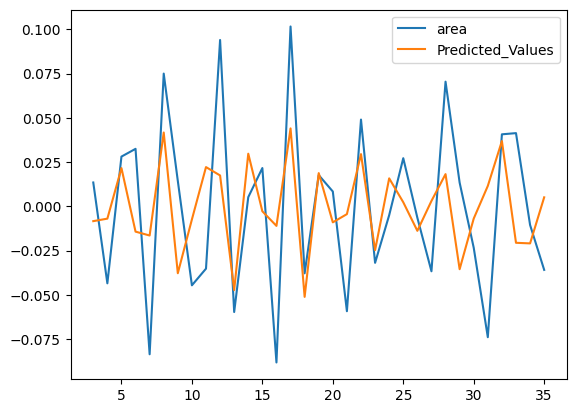

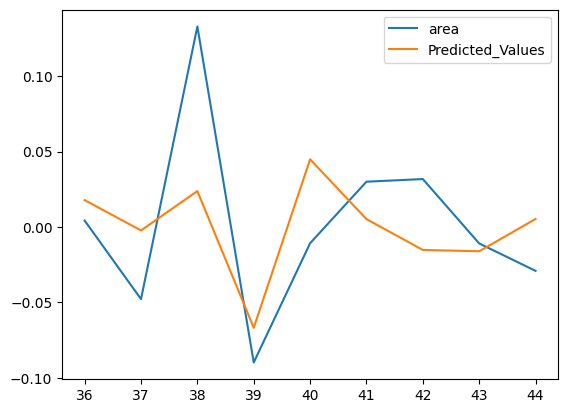

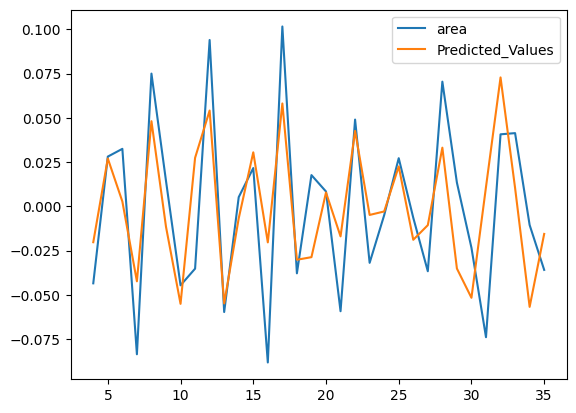

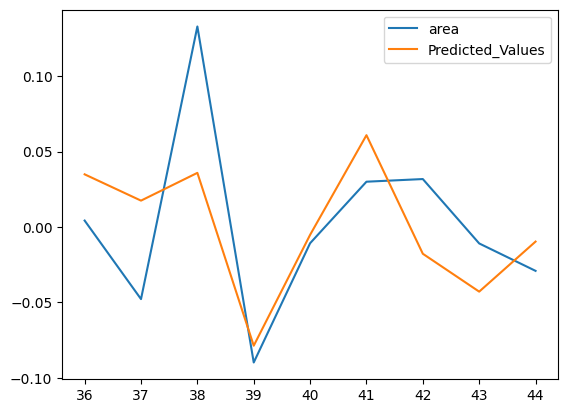

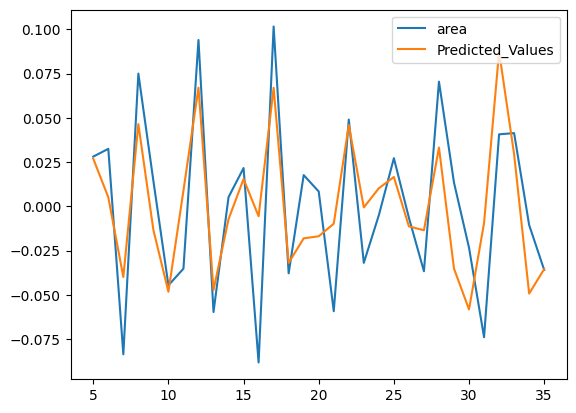

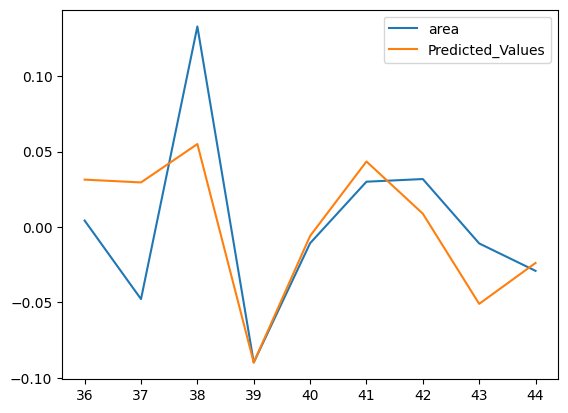

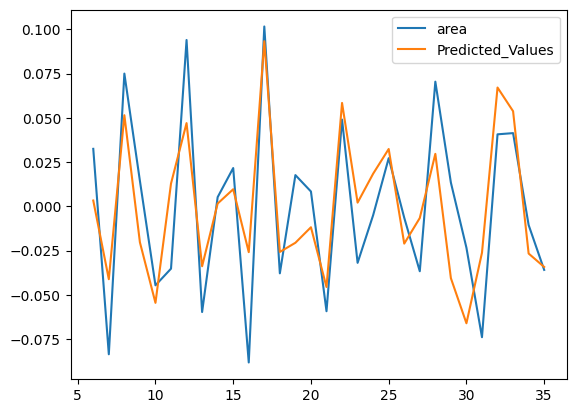

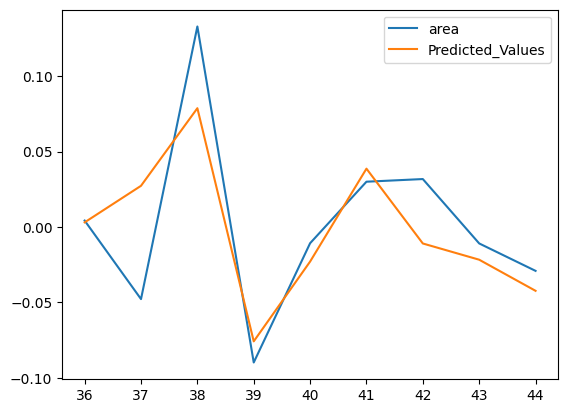

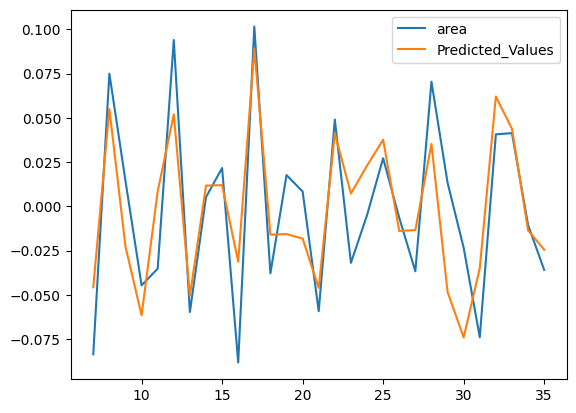

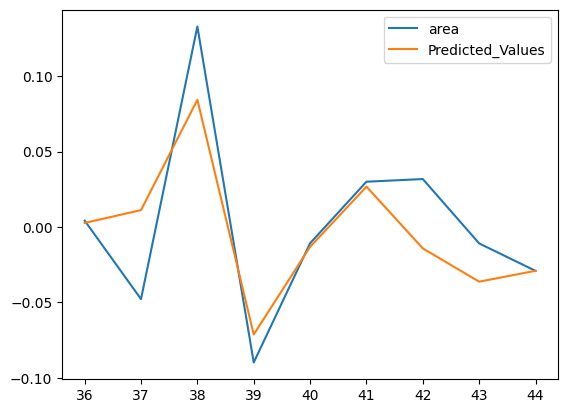

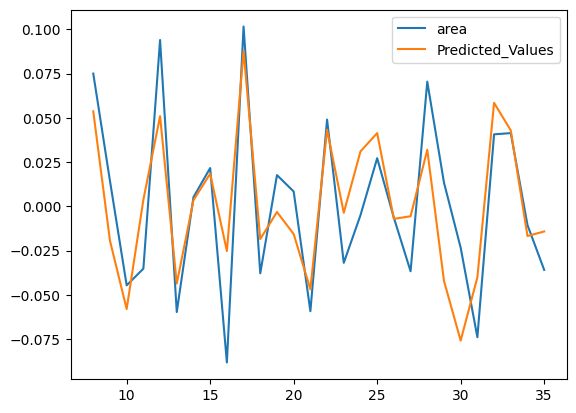

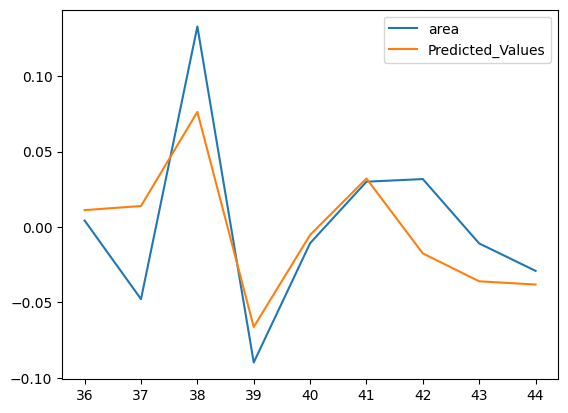

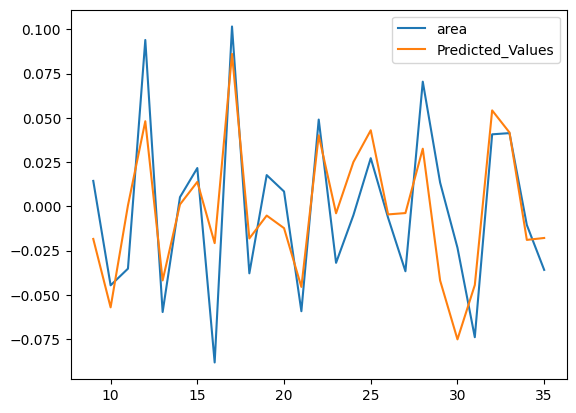

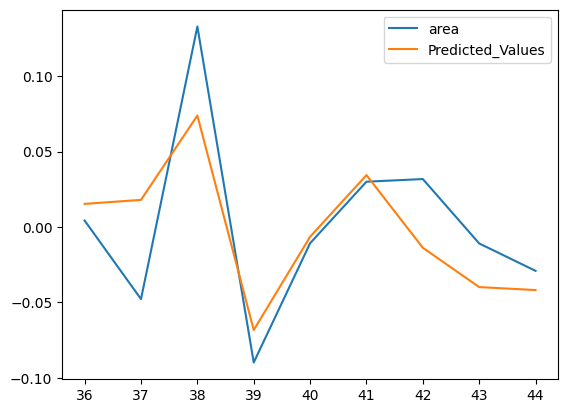

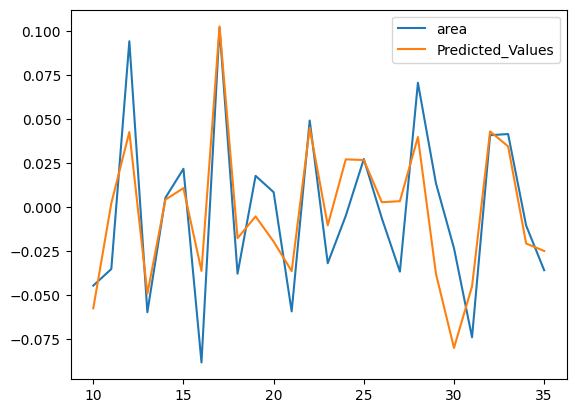

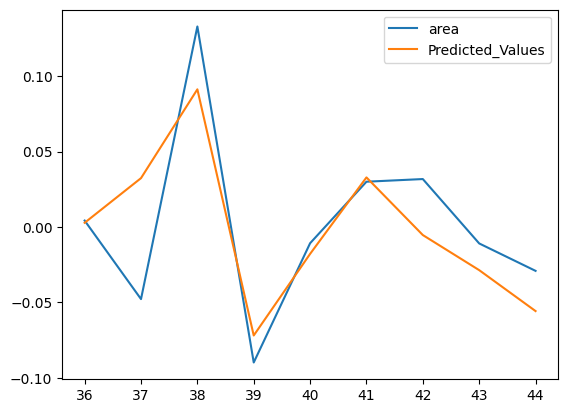

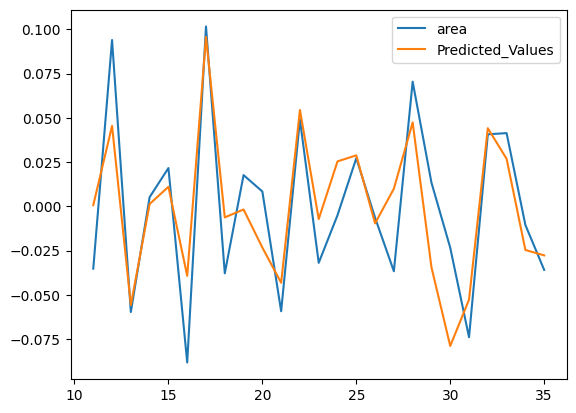

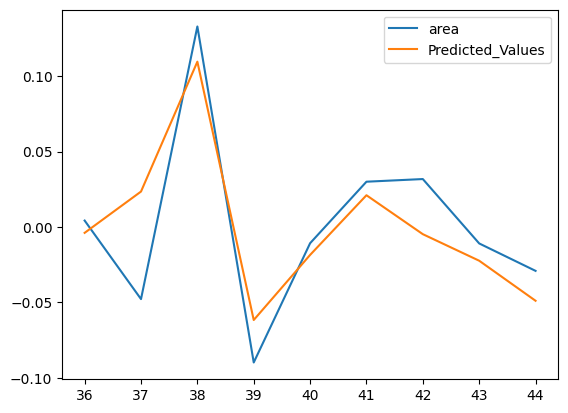

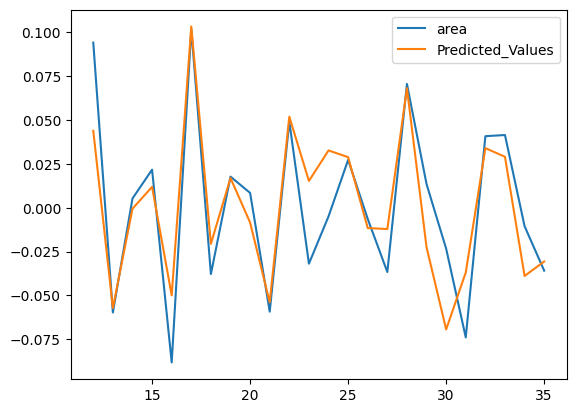

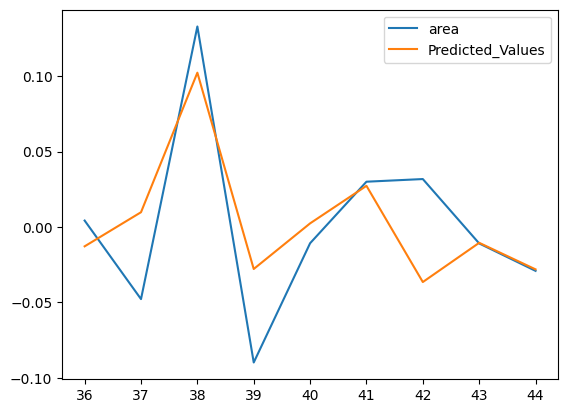

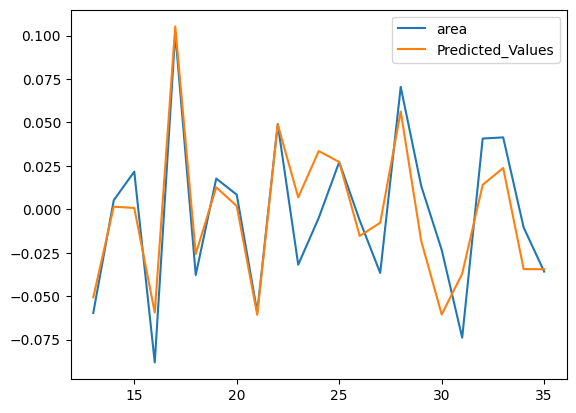

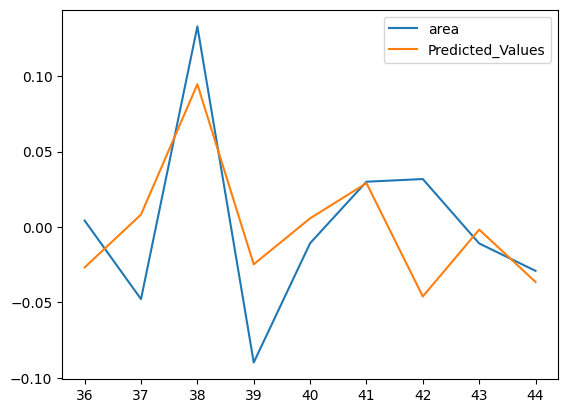

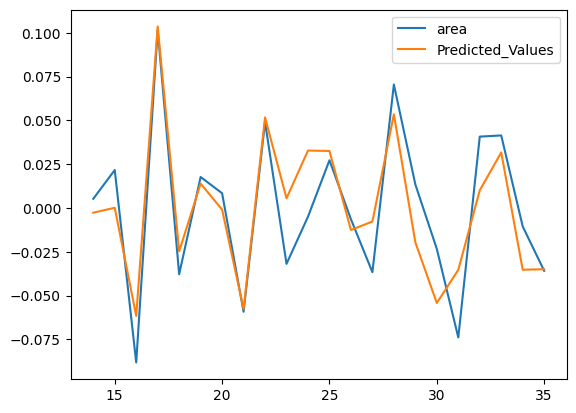

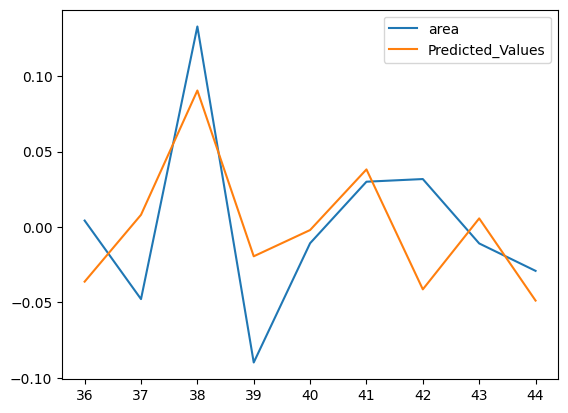

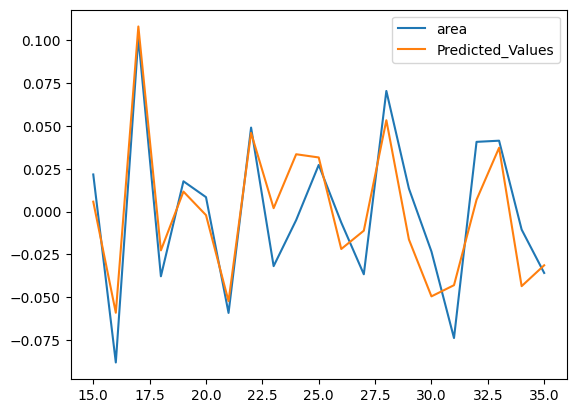

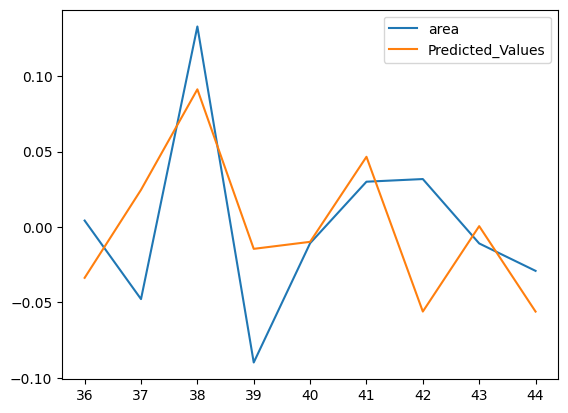

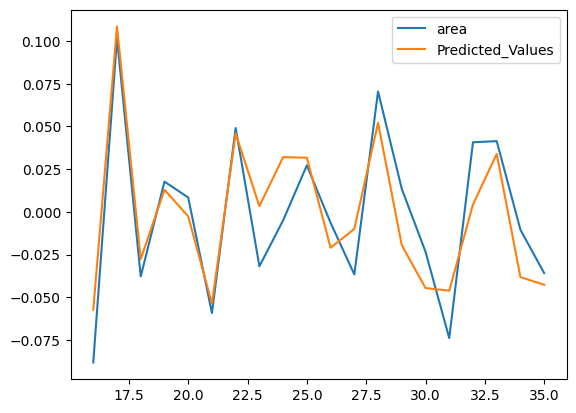

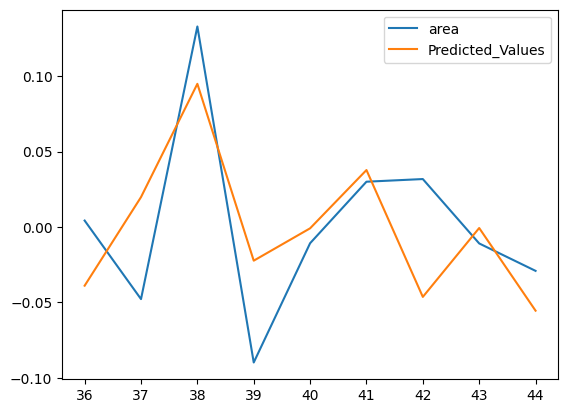

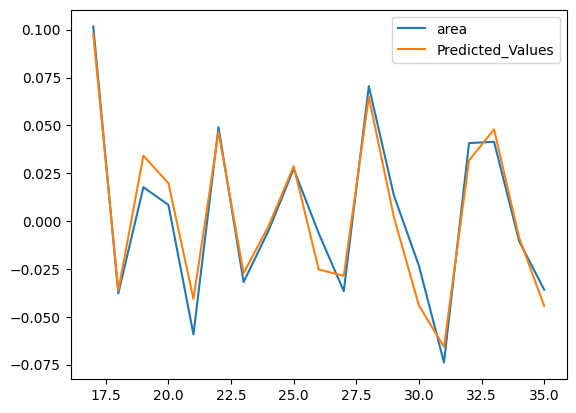

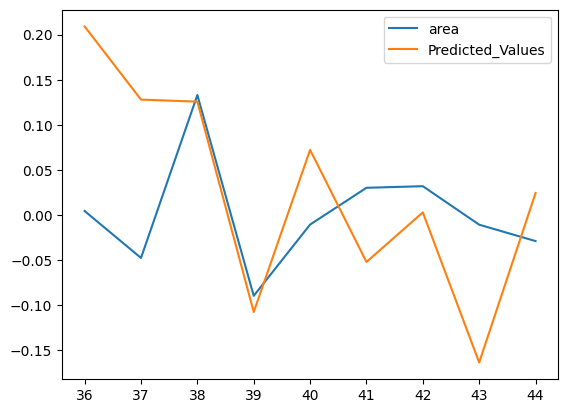

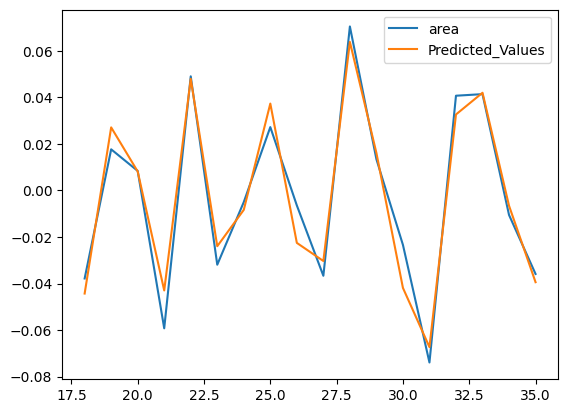

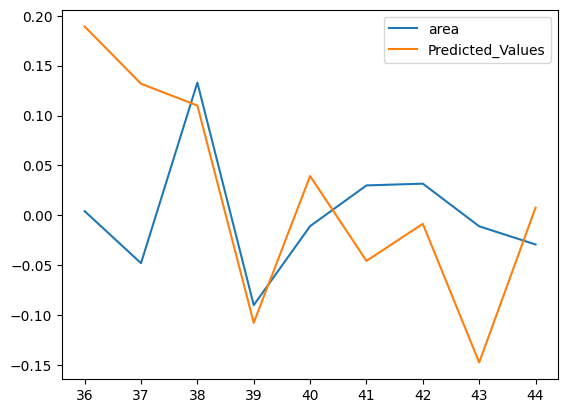

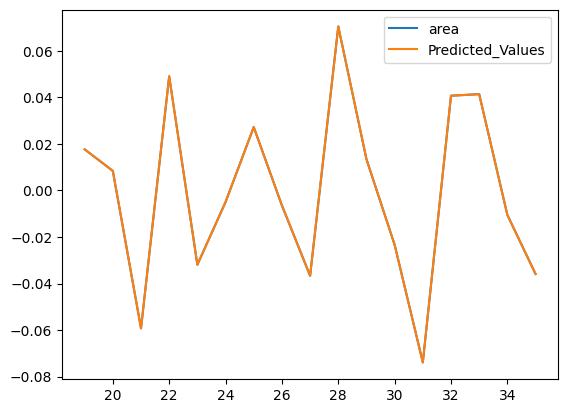

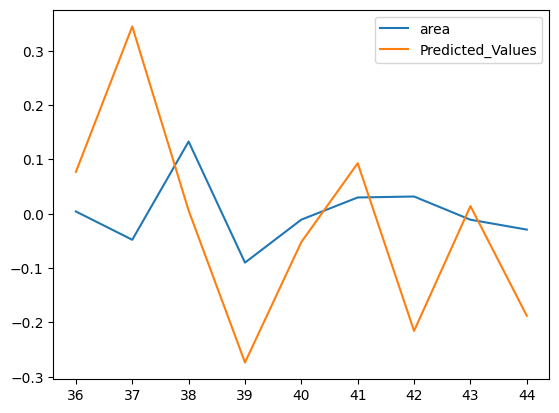

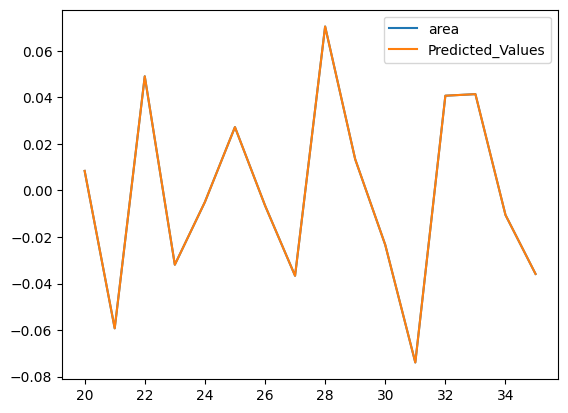

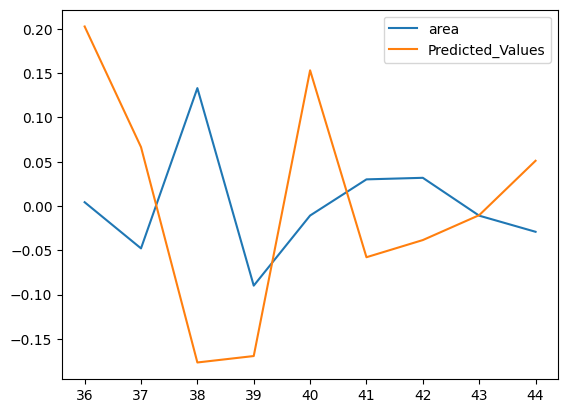

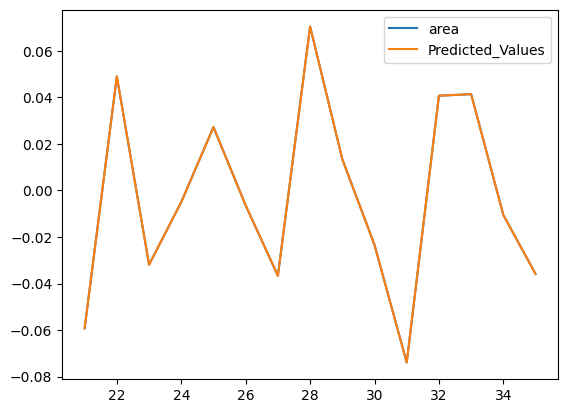

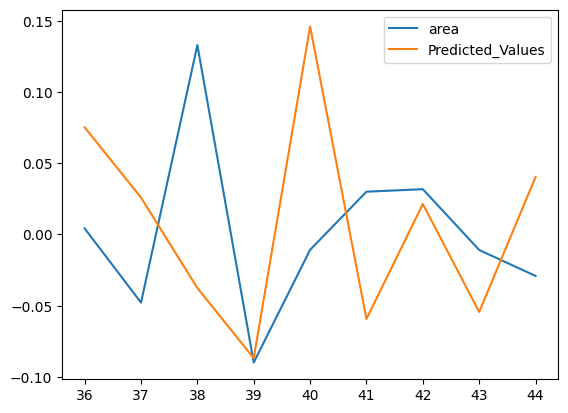

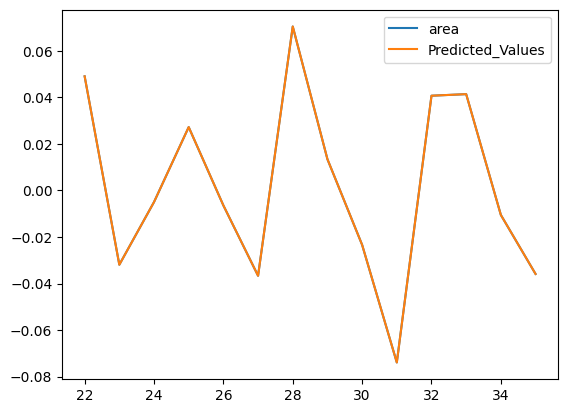

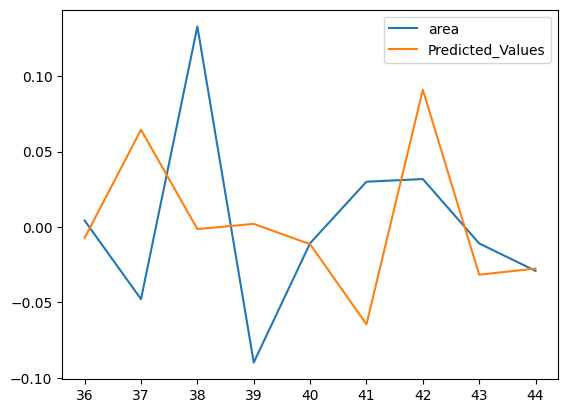

In [ ]:
for i in range(1,21):
  [df_train,df_test,theta,intercept,RMSE] = AR(i,pd.DataFrame(df1.area))

<ipython-input-89-baeadf699651>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.04433486759203333 , Value of p :  12


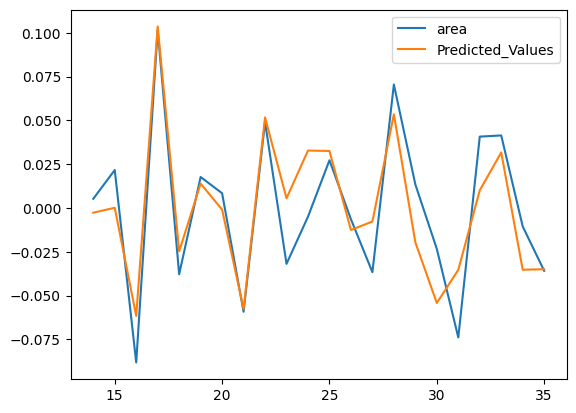

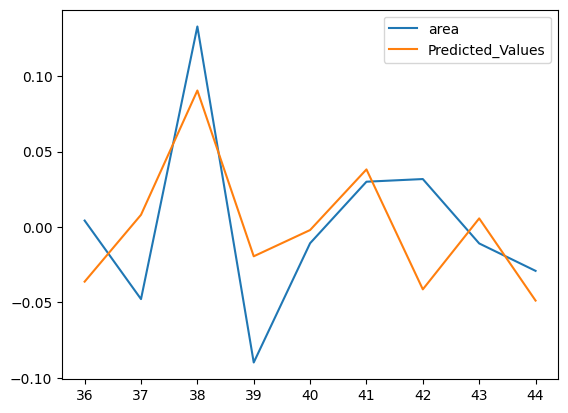

In [ ]:
[df_train,df_test,theta,intercept,RMSE] = AR(12,pd.DataFrame(df1.area))

<Axes: >

<Figure size 500x300 with 0 Axes>

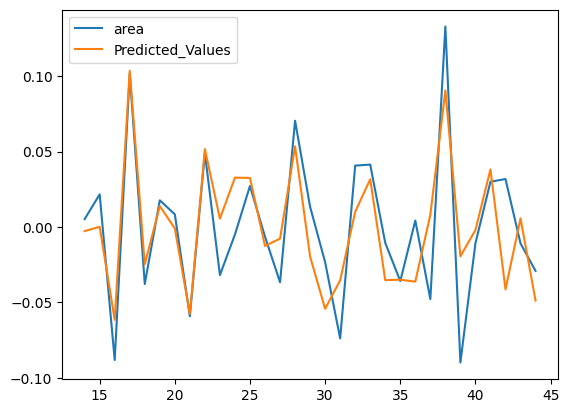

In [ ]:
df2 = pd.concat([df_train,df_test])
plt.figure(figsize=(5,3))
df2[['area','Predicted_Values']].plot()

In [ ]:
res = pd.DataFrame()
res['Residuals'] = df2.area - df2.Predicted_Values

In [ ]:
res

,Residuals
14,0.007933
15,0.021551
16,-0.026597
17,-0.001941
18,-0.013071
19,0.003774
20,0.009342
21,-0.001630
22,-0.002631
23,-0.037426


<Axes: ylabel='Density'>

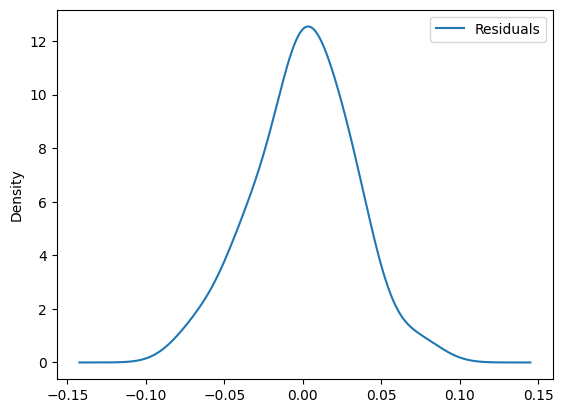

In [ ]:
res.plot(kind='kde')

In [ ]:
def MA(q,res):

  for i in range(1,q+1):
    res['Shifted_values_%d' % i ] = res['Residuals'].shift(i)

  train_size = (int)(0.8 * res.shape[0])

  res_train = pd.DataFrame(res[0:train_size])
  res_test = pd.DataFrame(res[train_size:res.shape[0]])

  res_train_2 = res_train.dropna()
  X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
  y_train = res_train_2.iloc[:,0].values.reshape(-1,1)

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # res_train_2[['Residuals','Predicted_Values']].plot()

  X_test = res_test.iloc[:,1:].values.reshape(-1,q)
  res_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  res_test[['Residuals','Predicted_Values']].plot()

  from sklearn.metrics import mean_squared_error
  RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of q : ",q)
  return [res_train_2,res_test,theta,intercept,RMSE]

<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

The RMSE is : 0.04007811160484157 , Value of q :  1
The RMSE is : 0.03835749141858555 , Value of q :  2
The RMSE is : 0.035011858307170775 , Value of q :  3


<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

The RMSE is : 0.03440707345260225 , Value of q :  4
The RMSE is : 0.03420960427027151 , Value of q :  5
The RMSE is : 0.03782252231545409 , Value of q :  6


<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

The RMSE is : 0.041072768636172756 , Value of q :  7
The RMSE is : 0.05213140653408428 , Value of q :  8
The RMSE is : 0.05500362898686332 , Value of q :  9


<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

The RMSE is : 0.06485330259442197 , Value of q :  10
The RMSE is : 0.06968458463442379 , Value of q :  11
The RMSE is : 0.06652308826199253 , Value of q :  12


<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

The RMSE is : 0.06418742638865037 , Value of q :  13
The RMSE is : 0.059252989727214316 , Value of q :  14
The RMSE is : 0.038632384336387715 , Value of q :  15


<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.040304814897050775 , Value of q :  16
The RMSE is : 0.0407607708242026 , Value of q :  17
The RMSE is : 0.04040824322944935 , Value of q :  18
The RMSE is : 0.04147712281479854 , Value of q :  19


<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

The RMSE is : 0.03981345237416333 , Value of q :  20


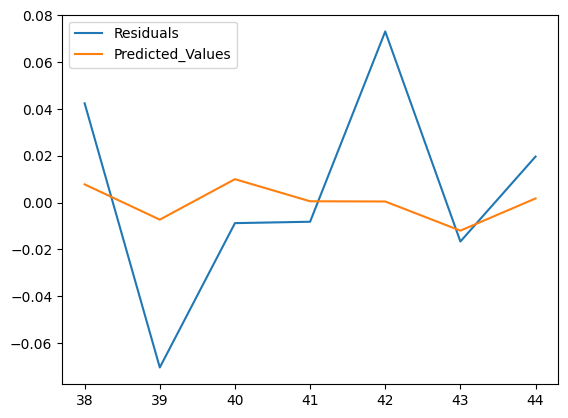

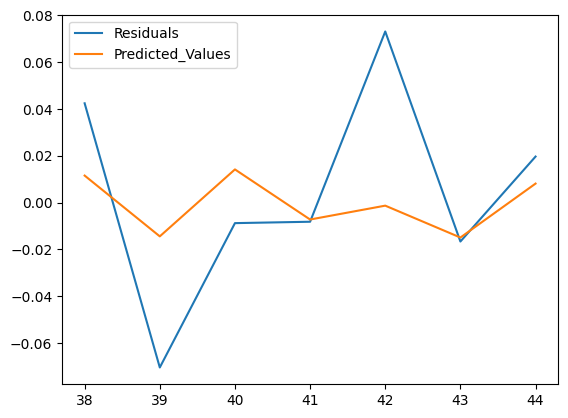

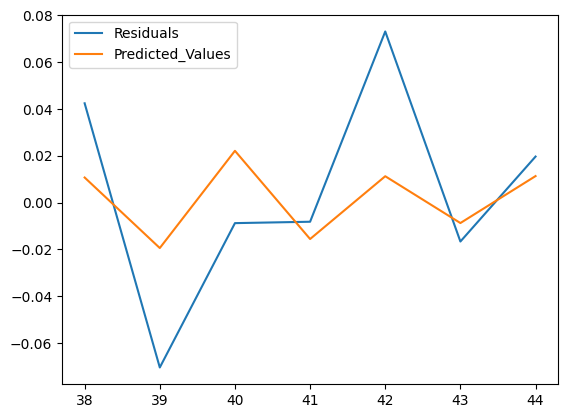

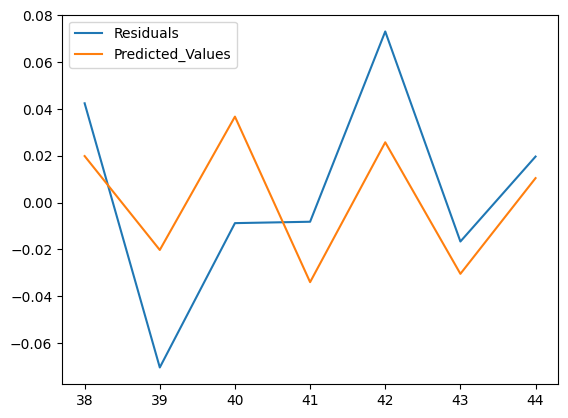

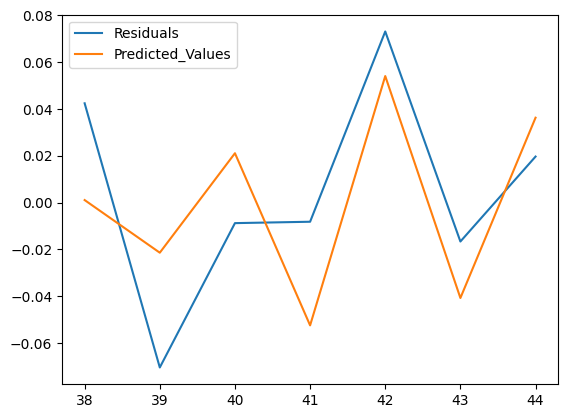

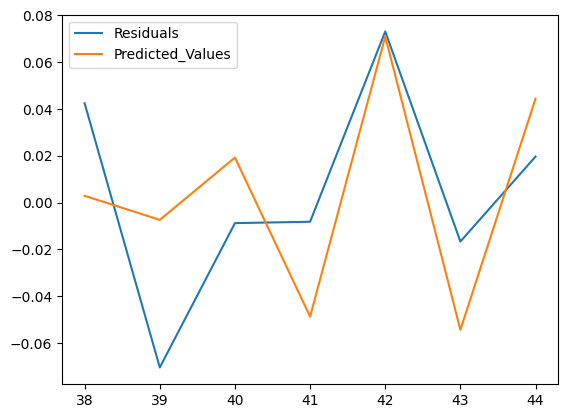

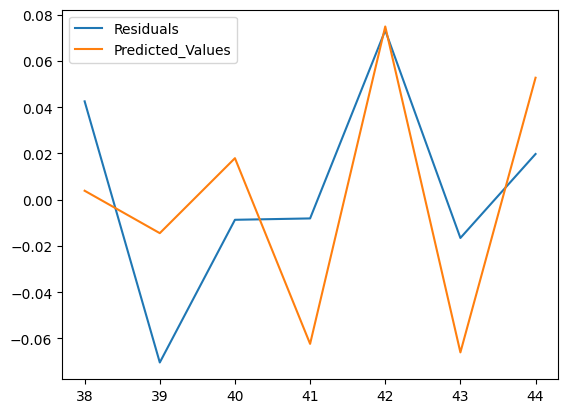

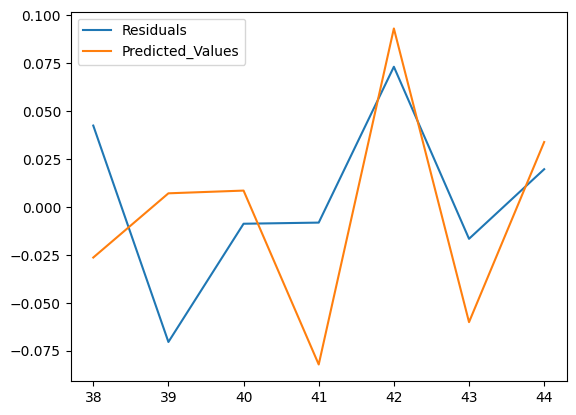

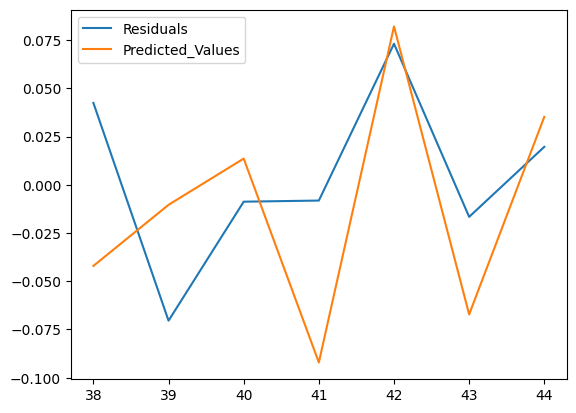

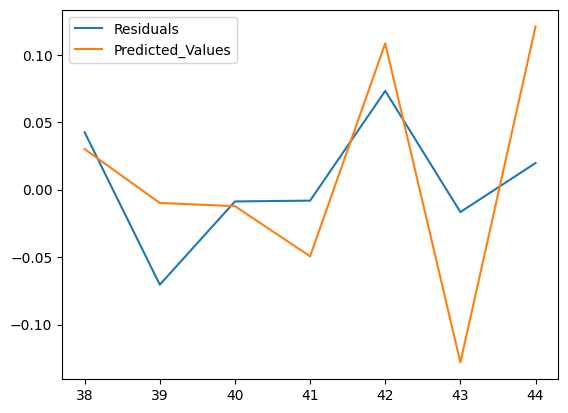

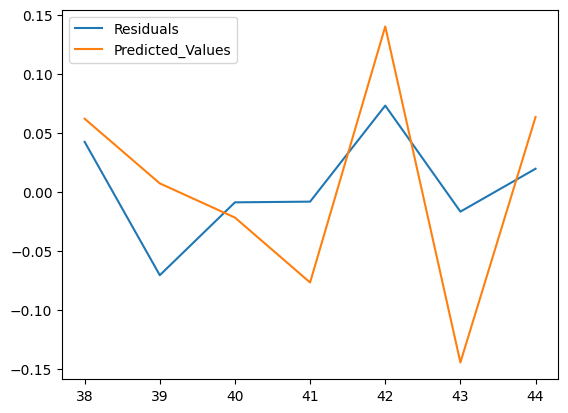

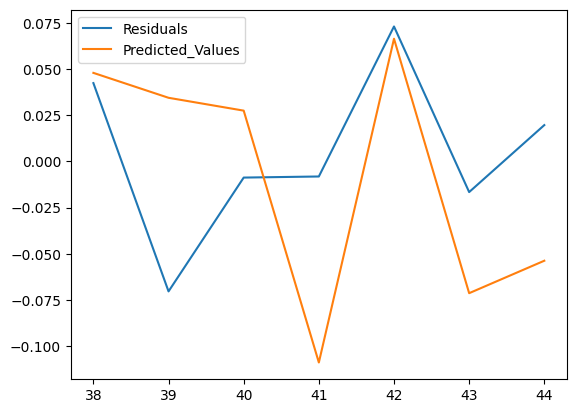

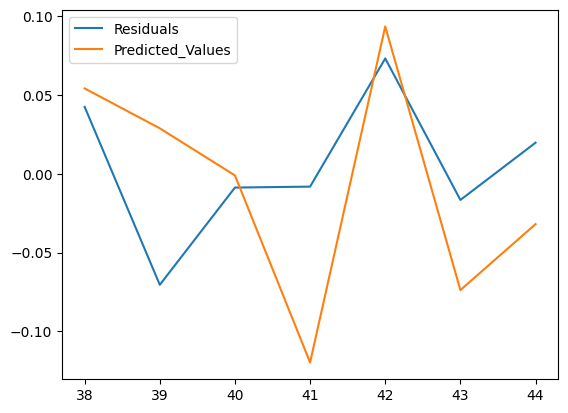

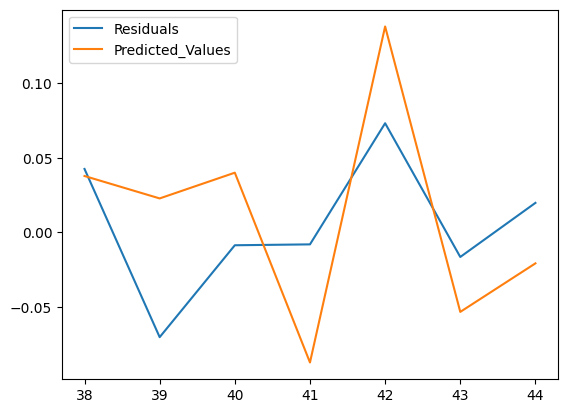

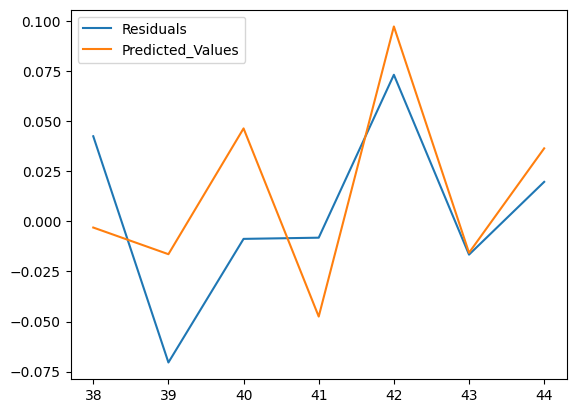

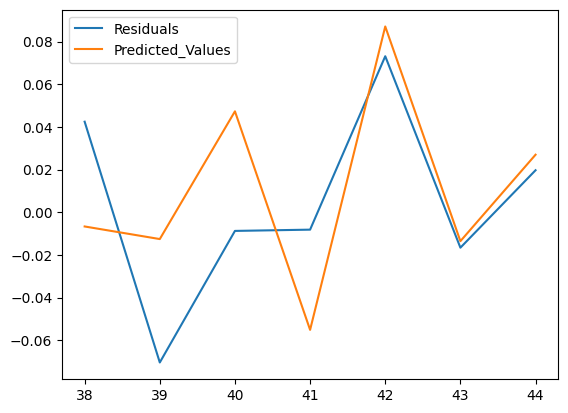

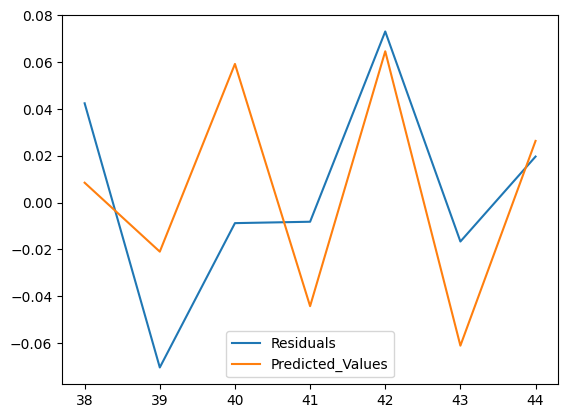

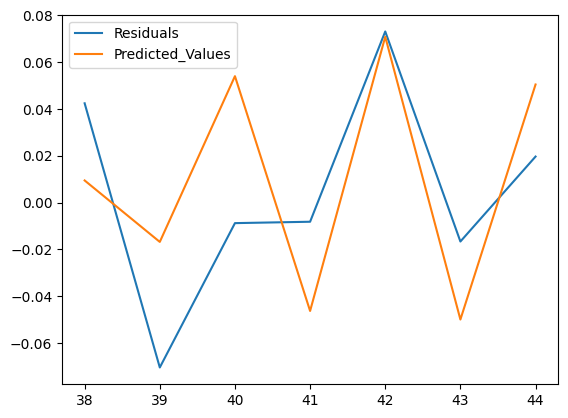

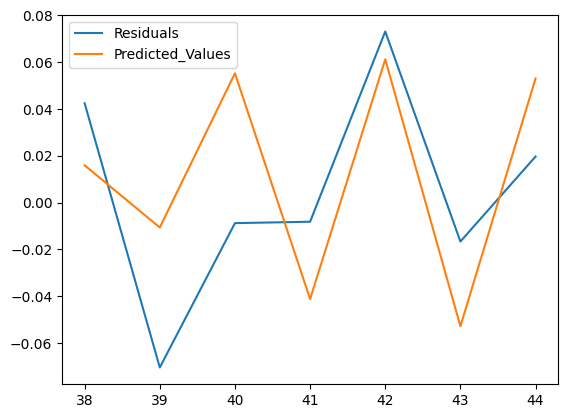

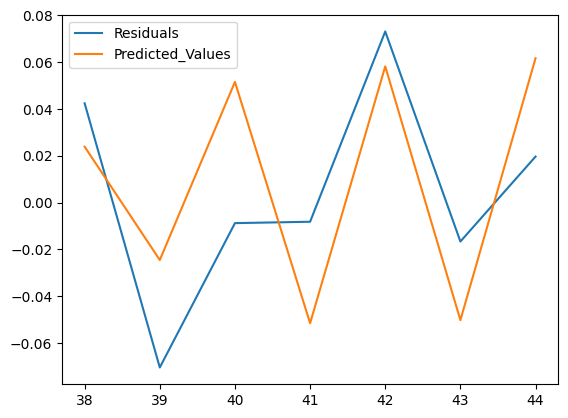

In [ ]:
for i in range(1,21):
  [res_train,res_test,theta,intercept,RMSE] = MA(i,pd.DataFrame(res.Residuals))

<ipython-input-103-665affe5b0b4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 0.06652308826199253 , Value of q :  12
[[-0.62257564]
 [-0.49447357]
 [-0.33255673]
 [ 0.84521747]
 [-0.20167349]
 [-0.24926753]
 [-0.3284293 ]
 [-0.55475136]
 [ 0.07086808]
 [ 0.47942727]
 [-0.61008144]
 [-1.08473878]]
[0.00459152]


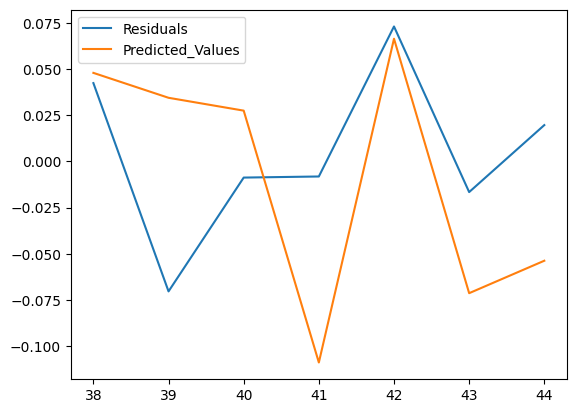

In [ ]:
[res_train,res_test,theta,intercept,RMSE] = MA(12,pd.DataFrame(res.Residuals))
print(theta)
print(intercept)

In [ ]:
res1 = pd.concat([res_train,res_test])
res1

,Residuals,Shifted_values_1,Shifted_values_2,Shifted_values_3,Shifted_values_4,Shifted_values_5,Shifted_values_6,Shifted_values_7,Shifted_values_8,Shifted_values_9,Shifted_values_10,Shifted_values_11,Shifted_values_12,Predicted_Values
26,0.006144,-0.005298,-0.037741,-0.037426,-0.002631,-0.001630,0.009342,0.003774,-0.013071,-0.001941,-0.026597,0.021551,0.007933,0.006144
27,-0.028929,0.006144,-0.005298,-0.037741,-0.037426,-0.002631,-0.001630,0.009342,0.003774,-0.013071,-0.001941,-0.026597,0.021551,-0.028929
28,0.017019,-0.028929,0.006144,-0.005298,-0.037741,-0.037426,-0.002631,-0.001630,0.009342,0.003774,-0.013071,-0.001941,-0.026597,0.017019
29,0.033040,0.017019,-0.028929,0.006144,-0.005298,-0.037741,-0.037426,-0.002631,-0.001630,0.009342,0.003774,-0.013071,-0.001941,0.033040
30,0.030886,0.033040,0.017019,-0.028929,0.006144,-0.005298,-0.037741,-0.037426,-0.002631,-0.001630,0.009342,0.003774,-0.013071,0.030886
31,-0.038609,0.030886,0.033040,0.017019,-0.028929,0.006144,-0.005298,-0.037741,-0.037426,-0.002631,-0.001630,0.009342,0.003774,-0.038609
32,0.030680,-0.038609,0.030886,0.033040,0.017019,-0.028929,0.006144,-0.005298,-0.037741,-0.037426,-0.002631,-0.001630,0.009342,0.030680
33,0.009692,0.030680,-0.038609,0.030886,0.033040,0.017019,-0.028929,0.006144,-0.005298,-0.037741,-0.037426,-0.002631,-0.001630,0.009692
34,0.024736,0.009692,0.030680,-0.038609,0.030886,0.033040,0.017019,-0.028929,0.006144,-0.005298,-0.037741,-0.037426,-0.002631,0.024736
35,-0.000925,0.024736,0.009692,0.030680,-0.038609,0.030886,0.033040,0.017019,-0.028929,0.006144,-0.005298,-0.037741,-0.037426,-0.000925


In [ ]:
df2.Predicted_Values += res1.Predicted_Values

<Axes: >

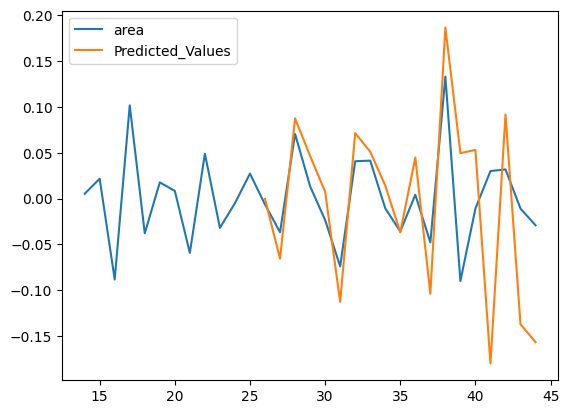

In [ ]:
df2[['area','Predicted_Values']].plot()

<Axes: >

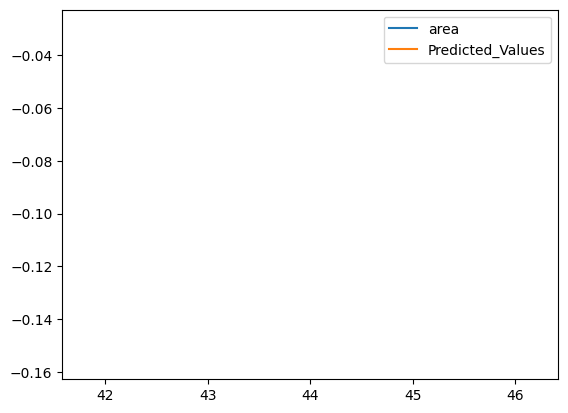

In [ ]:
df2.iloc[30:,:][['area','Predicted_Values']].plot()